[View in Colaboratory](https://colab.research.google.com/gist/hellocybernetics/4c06d950bce0596a6ffc2cfc84454394/basic_machine_learning.ipynb)

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import matplotlib.pyplot as plt
import seaborn as sns
tf.enable_eager_execution()

/Users/karaage/.pyenv/versions/anaconda3-4.4.0/envs/ml/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import platform
print("python " + platform.python_version())
import pkg_resources
pkglist = ['numpy', 'tensorflow', 'matplotlib', 'seaborn', 'pandas']
for dist in pkg_resources.working_set:
    if dist.project_name in pkglist:
        print(dist.project_name, dist.version)

python 3.6.1
tensorflow 1.9.0rc1
seaborn 0.7.1
pandas 0.20.1
numpy 1.14.5
matplotlib 2.1.2


In [3]:
def toy_linear_data():
  x = np.linspace(-3, 3, 50)
  y = 3 * x + np.random.randn(50) - 4
  return x, y

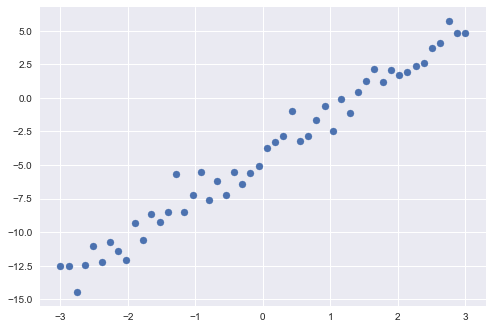

In [4]:
x, y = toy_linear_data()
plt.scatter(x, y)
plt.show()

In [5]:
class Model(tf.keras.Model):
  def __init__(self):
    super(Model, self).__init__()
    self.a = tf.contrib.eager.Variable(dtype=tf.float32,
                                       initial_value=-3)
    self.b = tf.contrib.eager.Variable(dtype=tf.float32,
                                       initial_value=2)
  
  def call(self, x):
    return self.a * x + self.b
  
  def loss_fn(self, x, y):
    y_pre = self(x)
    mse = 0.5 * (y - y_pre) ** 2 
    return tf.reduce_sum(mse)
  
  def grads_fn(self, x, y):
    with tfe.GradientTape() as tape:
      loss = self.loss_fn(x, y)
      return tape.gradient(loss, [self.a, self.b])
    
  def update(self, x, y, lr=0.001):
    grads = self.grads_fn(x, y)
    ## variable.assign_sub(value)
    ## variable -= value
    self.a.assign_sub(lr * grads[0])
    self.b.assign_sub(lr * grads[1])
      

In [6]:
model = Model()

In [7]:
y_init = model(x)

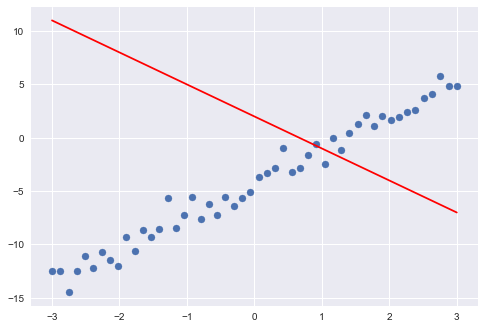

In [9]:
plt.scatter(x, y)
plt.plot(x, y_init, c='r')
plt.show()

In [10]:
reg = []
loss = []
for _ in range(100):
    y_pre = model(x)
    reg.append((x, y_pre))
    model.update(x, y)
    loss.append(model.loss_fn(x, y))

In [11]:
print(model.a.numpy())
print(model.b.numpy())

3.1164525
-4.1699514


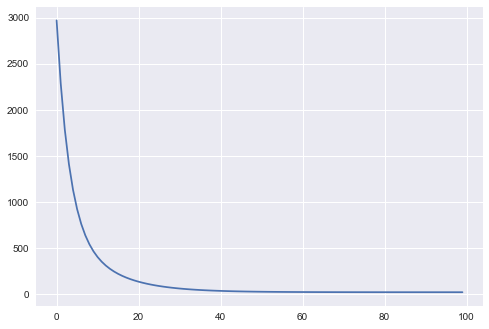

In [12]:
plt.plot(range(100), loss)
plt.show()

In [13]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axes, and the plot element
fig, ax = plt.subplots()
plt.close()
ax.set_xlim((-4, 4))
ax.set_ylim((-15, 15))
ax.scatter(x, y)
line1, = ax.plot([], [], lw=2, c='r', linestyle="dashed")
line2, = ax.plot([], [], lw=2, c='g')
# initialization function: plot the background of each frame
def init():
    line1.set_data(x, y_init)      
    return (line1,)
# animation function: this is called sequentially
def animate(i):
  (x_reg, y_reg) = reg[i]
  
  # gradient_line will have the form m*x + b
#   m = np.cos(at_x)
#   b = np.sin(at_x) - np.cos(at_x)*at_x
#   gradient_line = m*x + b
  
  line2.set_data(x_reg, y_reg)
  return (line2,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=50, blit=True)
rc('animation', html='jshtml')
anim